In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


***US 10 Treasury Yield***

In [6]:
sd = datetime(2000, 3, 15)
ed = datetime(2021, 3, 15)

In [7]:
ust = pdr.DataReader(name = 'DGS10', data_source = 'fred', start = sd, end = ed)
ust

,DGS10
DATE,
2000-03-15,6.29
2000-03-16,6.26
2000-03-17,6.20
2000-03-20,6.18
2000-03-21,6.13
...,...
2021-03-09,1.55
2021-03-10,1.53
2021-03-11,1.54


***US Tech stock market (QQQ)***

In [8]:
qqq = pdr.get_data_yahoo(symbols='QQQ', start=sd, end=ed)
qqq

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-03-14,113.375000,105.000000,112.750000,107.375000,39106800.0,93.455231
2000-03-15,107.000000,101.875000,106.500000,102.875000,51202600.0,89.538612
2000-03-16,109.250000,101.000000,105.375000,108.750000,55282200.0,94.652000
2000-03-17,111.062500,107.937500,108.000000,110.812500,31422400.0,96.447083
2000-03-20,111.500000,106.250000,111.000000,107.687500,21167200.0,93.727234
...,...,...,...,...,...,...
2021-03-09,313.730011,306.920013,307.470001,311.769989,80107600.0,311.769989
2021-03-10,316.470001,310.170013,316.160004,310.880005,76547300.0,310.880005
2021-03-11,319.859985,314.850006,315.769989,318.040009,53244500.0,318.040009


***Aligned data***

In [9]:
data = qqq.join(ust)
data

,High,Low,Open,Close,Volume,Adj Close,DGS10
Date,,,,,,,
2000-03-14,113.375000,105.000000,112.750000,107.375000,39106800.0,93.455231,NaN
2000-03-15,107.000000,101.875000,106.500000,102.875000,51202600.0,89.538612,6.29
2000-03-16,109.250000,101.000000,105.375000,108.750000,55282200.0,94.652000,6.26
2000-03-17,111.062500,107.937500,108.000000,110.812500,31422400.0,96.447083,6.20
2000-03-20,111.500000,106.250000,111.000000,107.687500,21167200.0,93.727234,6.18
...,...,...,...,...,...,...,...
2021-03-09,313.730011,306.920013,307.470001,311.769989,80107600.0,311.769989,1.55
2021-03-10,316.470001,310.170013,316.160004,310.880005,76547300.0,310.880005,1.53
2021-03-11,319.859985,314.850006,315.769989,318.040009,53244500.0,318.040009,1.54


In [10]:
data = data.sort_values(by='Date')\
           .fillna(method='ffill')\
           .dropna()
data

,High,Low,Open,Close,Volume,Adj Close,DGS10
Date,,,,,,,
2000-03-15,107.000000,101.875000,106.500000,102.875000,51202600.0,89.538612,6.29
2000-03-16,109.250000,101.000000,105.375000,108.750000,55282200.0,94.652000,6.26
2000-03-17,111.062500,107.937500,108.000000,110.812500,31422400.0,96.447083,6.20
2000-03-20,111.500000,106.250000,111.000000,107.687500,21167200.0,93.727234,6.18
2000-03-21,111.937500,103.562500,106.125000,111.750000,33435100.0,97.263069,6.13
...,...,...,...,...,...,...,...
2021-03-09,313.730011,306.920013,307.470001,311.769989,80107600.0,311.769989,1.55
2021-03-10,316.470001,310.170013,316.160004,310.880005,76547300.0,310.880005,1.53
2021-03-11,319.859985,314.850006,315.769989,318.040009,53244500.0,318.040009,1.54


***Visualization***

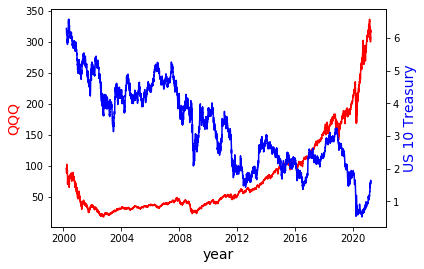

In [11]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(data.index, data["Adj Close"], color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("QQQ",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data.index, data["DGS10"],color="blue")
ax2.set_ylabel("US 10 Treasury",color="blue",fontsize=14)
plt.show()

***為何2020殖利率達到歷史低點 0.5%?***
1. 2020/3 FED 啟動無限QE，美國印炒票瘋狂買入美國國債，導致強勁的市場需求，美國國債價格暴漲，殖利率暴跌
2. 藉由殖利率下降，讓金融機構將所持有美國國債賣掉，而去買其他的風險性資產(股市)
3. 使得股票資產價格上升，來促進借貸/消費，促進經濟

***為何現在殖利率上升? (很多機構在賣美國國債)***
1. 這個世界對通貨膨脹的預期改變了
2. 如果發現未來的物價變貴速度很快，你怎麼會把錢去存定存呢? 把錢去投資美國債券?
3. 什麼資產可以最好的對抗通貨膨脹，比特幣? (這個沒有證據)
4. 為什麼大家覺得通膨要來了，1)疫苗成功研發，實體經濟重新開發，報復性消費 
                           2)民主黨完全執政，1.9兆將透過政府(財政部)支出流入實體經濟 
                           3)原物料漲價，因疫情關係，很多礦場無法開工，原物料存貨很低，經濟重啟需求將暴增
5. 科技股還可以買嗎?


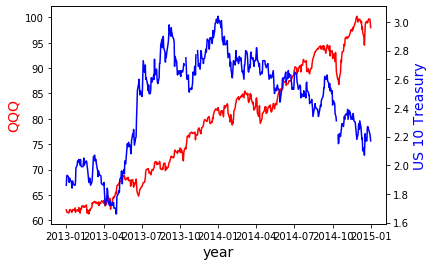

In [51]:
start = datetime(2013, 1, 1)
end = datetime(2014, 12, 31)
data= data.loc[start:end, :]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(data.index, data["Adj Close"], color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("QQQ",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data.index, data["DGS10"],color="blue")
ax2.set_ylabel("US 10 Treasury",color="blue",fontsize=14)
plt.show()

***依據過去經驗，並不試每一種殖利率上升，對股市的影響都一樣***
2008年海嘯後，美國花了五年，經歷三次QE，在2013年走出低潮，2013/4至2013/5殖利率緩步上升，科技股也隨之上漲，世界共識美國經濟正在好轉，此情境不需要擔心，因為預期企業獲利將變得更好
暴跌可能性發生在升息太快，FED很快把錢收回去

***如何抗通膨?***
買金融股/銅、油的製造商/能源股
巴菲特在2020Q4操作，減持科技股，買能源公司雪弗龍，出清所有黃金(負利率資產)，從2021Q1來看，這些決定都很正確

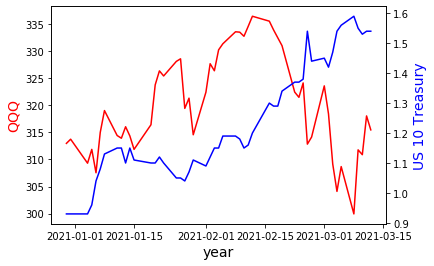

In [7]:
start = datetime(2020, 12, 30)
end = datetime(2021, 3, 15)
data= data.loc[start:end, :]
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(data.index, data["Adj Close"], color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("QQQ",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data.index, data["DGS10"],color="blue")
ax2.set_ylabel("US 10 Treasury",color="blue",fontsize=14)
plt.show()

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
data = sm.datasets.macrodata.load_pandas()
data = data.data[["realgdp", "realcons"]].pct_change().dropna()
data
grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1
ssr based chi2 test:   chi2=29.1600 , p=0.0000  , df=1
likelihood ratio test: chi2=27.2295 , p=0.0000  , df=1
parameter F test:         F=28.7248 , p=0.0000  , df_denom=198, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2
ssr based chi2 test:   chi2=38.9498 , p=0.0000  , df=2
likelihood ratio test: chi2=35.5873 , p=0.0000  , df=2
parameter F test:         F=18.9880 , p=0.0000  , df_denom=195, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=41.9812 , p=0.0000  , df=3
likelihood ratio test: chi2=38.0914 , p=0.0000  , df=3
parameter F test:         F=13.5015 , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=10.9646 , p=0.0000  

{1: ({'ssr_ftest': (28.724803414849184, 2.3081455830243248e-07, 198.0, 1),
   'ssr_chi2test': (29.160027709013566, 6.663994390982364e-08, 1),
   'lrtest': (27.229456246460813, 1.806848015206724e-07, 1),
   'params_ftest': (28.72480341484925, 2.3081455830242645e-07, 198.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (18.988046084107488, 2.920904547277462e-08, 195.0, 2),
   'ssr_chi2test': (38.949838121246124, 3.484577407030354e-09, 2),
   'lrtest': (35.587256203442394, 1.8720847364547857e-08, 2),
   'params_ftest': (18.98804608410745, 2.9209045472775375e-08, 195.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (13.501476217751746, 4.961196622274178e-08, 192.0, 3),
   'ssr_chi2test': (41.98115261457184, 4.04924604850433e-09, 3),
   'lrtest': (38.091366257052414, 2.7033433661640424e-08, 3),
   'params_ftest': (13.501476217751756, 4.961196622274114e-08, 192.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.,

https://www.biaodianfu.com/granger-causality-test.html